In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('/content/Healthcare Providers.csv')

Getting Dataset


In [4]:
print("First 5 rows of the dataset:")
df.head(5)

First 5 rows of the dataset:


,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


Finding number of rows and columns


In [5]:
rows, columns = df.shape
print(f"The dataset contains {rows} rows and {columns} columns.")

The dataset contains 44895 rows and 27 columns.


Type of Columns


In [6]:
# View the data types of columns in the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44895 entries, 0 to 44894
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   index                                                     44895 non-null  int64  
 1   National Provider Identifier                              44895 non-null  int64  
 2   Last Name/Organization Name of the Provider               44895 non-null  object 
 3   First Name of the Provider                                42981 non-null  object 
 4   Middle Initial of the Provider                            31705 non-null  object 
 5   Credentials of the Provider                               41659 non-null  object 
 6   Gender of the Provider                                    42981 non-null  object 
 7   Entity Type of the Provider                               44895 non-null  object 
 8   Street Address 1

Counting Missing values


In [7]:
# Count missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   1914
Middle Initial of the Provider                              13190
Credentials of the Provider                                  3236
Gender of the Provider                                       1914
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            26650
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

Dropping the 'Street Address 2 of the Provider' column

In [8]:
df.drop(['Street Address 2 of the Provider'], axis=1, inplace=True)

Inspecting unique values in each column of the dataset

In [9]:
for column in df.columns:
    # Display the column name and its unique values
    print(f"Column: {column}")
    print(f"Unique Values: {df[column].unique()}")
    print("-" * 50)  # Separator for readability

Column: index
Unique Values: [8774979 3354385 3001884 ... 3032481 5058150 8778830]
--------------------------------------------------
Column: National Provider Identifier
Unique Values: [1891106191 1346202256 1306820956 ... 1841273968 1306882840 1891175428]
--------------------------------------------------
Column: Last Name/Organization Name of the Provider
Unique Values: ['UPADHYAYULA' 'JONES' 'DUROCHER' ... 'GITTLEMAN' 'BEINART' 'DYSART']
--------------------------------------------------
Column: First Name of the Provider
Unique Values: ['SATYASREE' 'WENDY' 'RICHARD' ... 'TILAK' 'AURELIA' 'RINI']
--------------------------------------------------
Column: Middle Initial of the Provider
Unique Values: [nan 'P' 'W' 'E' 'R' 'B' 'G' 'M' 'S' 'J' 'K' 'X' 'A' 'H' 'V' 'D' 'N' 'L'
 'C' 'T' 'F' 'I' 'O' 'U' 'Y' 'Z' 'Q']
--------------------------------------------------
Column: Credentials of the Provider
Unique Values: ['M.D.' 'DPM' 'MD' ... 'MD PHD.' 'RN-ARNP' 'NURSE PRACTIONER-FAM']
-------

Getting the frequency distribution of values in each column

In [10]:
for column in df.columns:
    # Display the column name and the frequency of each value
    print(f"Column: {column}")
    print("Value Counts:")
    print(df[column].value_counts())
    print("-" * 50)  # Separator for readability

Column: index
Value Counts:
index
8774979    1
3484785    1
3581634    1
6495894    1
6012388    1
          ..
9796063    1
5617547    1
204553     1
2575060    1
8778830    1
Name: count, Length: 44895, dtype: int64
--------------------------------------------------
Column: National Provider Identifier
Value Counts:
National Provider Identifier
1538144910    6
1659352276    4
1396746673    4
1689657975    4
1831327915    4
             ..
1174508378    1
1669551602    1
1275603805    1
1164536249    1
1891175428    1
Name: count, Length: 42582, dtype: int64
--------------------------------------------------
Column: Last Name/Organization Name of the Provider
Value Counts:
Last Name/Organization Name of the Provider
PATEL          264
SMITH          217
JOHNSON        178
LEE            163
WALGREEN CO    150
              ... 
CABAN            1
GOPALUNI         1
DARBANDI         1
SIELAFF          1
DYSART           1
Name: count, Length: 23818, dtype: int64
-----------------------

Handling Missing Values in Categorical Columns

In [11]:
# Identifying categorical columns for handling missing values
# These columns represent textual or identifier data rather than numeric or continuous values.
# Filling missing values with 'Unknown' makes sense as it retains the dataset's structure without introducing noise.
categorical_columns = [
    'First Name of the Provider',      # Categorical: Represents names, can be unknown if not provided
    'Middle Initial of the Provider', # Categorical: A single character or empty, 'Unknown' is an acceptable placeholder
    'Credentials of the Provider'     # Categorical: Professional qualifications, can be unknown
]

# Filling missing values with 'Unknown' for identified categorical columns
for column in categorical_columns:
    df[column] = df[column].fillna('Unknown')

# Filling missing values in 'Gender of the Provider' with the mode
# Gender is a limited categorical column (e.g., 'M', 'F', or NaN); replacing missing values with the most frequent value (mode) ensures logical consistency.
gender_mode = df['Gender of the Provider'].mode()[0]  # Calculate mode
df['Gender of the Provider'] = df['Gender of the Provider'].fillna(gender_mode)
print(f"Filled missing values in 'Gender of the Provider' with mode: {gender_mode}")

# Validate that all missing values are handled
missing_value = df.isnull().sum()
print("Missing values after filling:\n", missing_value)

Filled missing values in 'Gender of the Provider' with mode: M
Missing values after filling:
 index                                                       0
National Provider Identifier                                0
Last Name/Organization Name of the Provider                 0
First Name of the Provider                                  0
Middle Initial of the Provider                              0
Credentials of the Provider                                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
Street Address 1 of the Provider                            0
City of the Provider                                        0
Zip Code of the Provider                                    0
State Code of the Provider                                  0
Country Code of the Provider                                0
Provider Type                                               0
Medicare Participation Indicator      

Encoding for Categorical Columns

In [12]:
# Importing LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Encoding 'Gender of the Provider' into binary values (0 and 1)
df['Gender of the Provider'] = le.fit_transform(df['Gender of the Provider'])
print("Encoded 'Gender of the Provider' values:", df['Gender of the Provider'].unique())

# Encoding 'Medicare Participation Indicator' into binary values (0 and 1)
df['Medicare Participation Indicator'] = le.fit_transform(df['Medicare Participation Indicator'])
print("Encoded 'Medicare Participation Indicator' values:", df['Medicare Participation Indicator'].unique())

# Encoding 'Place of Service' into binary values (0 and 1)
df['Place of Service'] = le.fit_transform(df['Place of Service'])
print("Encoded 'Place of Service' values:", df['Place of Service'].unique())

# Encoding 'HCPCS Drug Indicator' into binary values (0 and 1)
df['HCPCS Drug Indicator'] = le.fit_transform(df['HCPCS Drug Indicator'])
print("Encoded 'HCPCS Drug Indicator' values:", df['HCPCS Drug Indicator'].unique())

# Encoding 'Entity Type of the Provider' into binary values (0 and 1)
df['Entity Type of the Provider'] = le.fit_transform(df['Entity Type of the Provider'])
print("Encoded 'Entity Type of the Provider' values:", df['Entity Type of the Provider'].unique())

Encoded 'Gender of the Provider' values: [0 1]
Encoded 'Medicare Participation Indicator' values: [1 0]
Encoded 'Place of Service' values: [0 1]
Encoded 'HCPCS Drug Indicator' values: [0 1]
Encoded 'Entity Type of the Provider' values: [0 1]


# Nominal Encoding

In [13]:
df['Gender of the Provider']

,Gender of the Provider
0,0
1,0
2,1
3,1
4,1
...,...
44890,1
44891,1
44892,1
44893,1


In [14]:
len(df['Gender of the Provider'].unique())

2

In [16]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')

In [18]:
ohe_transformed=ohe.fit_transform(df[['Gender of the Provider']])

In [19]:
ohe_transformed

,Gender of the Provider_0,Gender of the Provider_1
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
44890,0.0,1.0
44891,0.0,1.0
44892,0.0,1.0
44893,0.0,1.0


In [20]:
df=pd.concat([df,ohe_transformed],axis=1).drop(columns=['Gender of the Provider'])

In [21]:
df

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,City of the Provider,Zip Code of the Provider,...,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Gender of the Provider_0,Gender of the Provider_1
0,8774979,1891106191,UPADHYAYULA,SATYASREE,Unknown,M.D.,0,1402 S GRAND BLVD,SAINT LOUIS,631041004.0,...,0,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889,1.0,0.0
1,3354385,1346202256,JONES,WENDY,P,M.D.,0,2950 VILLAGE DR,FAYETTEVILLE,283043815.0,...,0,175,175,175,123.73,548.8,118.83,135.31525714,1.0,0.0
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,0,20 WASHINGTON AVE,NORTH HAVEN,64732343.0,...,0,32,13,32,90.65,155,64.4396875,60.5959375,0.0,1.0
3,7594822,1770523540,FULLARD,JASPER,Unknown,MD,0,5746 N BROADWAY ST,KANSAS CITY,641183998.0,...,0,20,18,20,3.5,5,3.43,3.43,0.0,1.0
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,0,875 MILITARY TRL,JUPITER,334585700.0,...,0,33,24,31,26.52,40,19.539393939,19.057575758,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44890,5657489,1578566527,DYSART,STANLEY,H,M.D.,0,300 TOWER RD NE,MARIETTA,300609403.0,...,0,129,91,107,56.318914729,214,26.530077519,25.265348837,0.0,1.0
44891,8307943,1841273968,CHILUKURI,KRISHNA,R,M.D.,0,4166 WYNTREE DR,NEWBURGH,476302521.0,...,0,28,27,28,40.14,69,24.8925,28.171428571,0.0,1.0
44892,3032481,1306882840,FRED MEYER STORES INC,Unknown,Unknown,Unknown,1,13000 LAKE CITY WAY NE,SEATTLE,981254429.0,...,1,16,16,16,191.91625,195.235,188.080625,188.080625,0.0,1.0
44893,5058150,1518217744,"LCMS SOLUTIONS, INC.",Unknown,Unknown,Unknown,1,7301 GIRARD AVE,LA JOLLA,920375125.0,...,0,13,13,13,9.59,12.87,9.4,9.4,0.0,1.0


# Ordinal Encoding

In [22]:
from sklearn.preprocessing import OrdinalEncoder

In [23]:
df['Place of Service'].unique()

array([0, 1])

In [31]:
order=['F','O']

In [32]:
enc=OrdinalEncoder(categories=[order])

In [34]:
df['Place of Service'] = df['Place of Service'].astype(str)

In [35]:
df

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,City of the Provider,Zip Code of the Provider,...,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Gender of the Provider_0,Gender of the Provider_1
0,8774979,1891106191,UPADHYAYULA,SATYASREE,Unknown,M.D.,0,1402 S GRAND BLVD,SAINT LOUIS,631041004.0,...,0,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889,1.0,0.0
1,3354385,1346202256,JONES,WENDY,P,M.D.,0,2950 VILLAGE DR,FAYETTEVILLE,283043815.0,...,0,175,175,175,123.73,548.8,118.83,135.31525714,1.0,0.0
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,0,20 WASHINGTON AVE,NORTH HAVEN,64732343.0,...,0,32,13,32,90.65,155,64.4396875,60.5959375,0.0,1.0
3,7594822,1770523540,FULLARD,JASPER,Unknown,MD,0,5746 N BROADWAY ST,KANSAS CITY,641183998.0,...,0,20,18,20,3.5,5,3.43,3.43,0.0,1.0
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,0,875 MILITARY TRL,JUPITER,334585700.0,...,0,33,24,31,26.52,40,19.539393939,19.057575758,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44890,5657489,1578566527,DYSART,STANLEY,H,M.D.,0,300 TOWER RD NE,MARIETTA,300609403.0,...,0,129,91,107,56.318914729,214,26.530077519,25.265348837,0.0,1.0
44891,8307943,1841273968,CHILUKURI,KRISHNA,R,M.D.,0,4166 WYNTREE DR,NEWBURGH,476302521.0,...,0,28,27,28,40.14,69,24.8925,28.171428571,0.0,1.0
44892,3032481,1306882840,FRED MEYER STORES INC,Unknown,Unknown,Unknown,1,13000 LAKE CITY WAY NE,SEATTLE,981254429.0,...,1,16,16,16,191.91625,195.235,188.080625,188.080625,0.0,1.0
44893,5058150,1518217744,"LCMS SOLUTIONS, INC.",Unknown,Unknown,Unknown,1,7301 GIRARD AVE,LA JOLLA,920375125.0,...,0,13,13,13,9.59,12.87,9.4,9.4,0.0,1.0


<Axes: xlabel='Place of Service'>

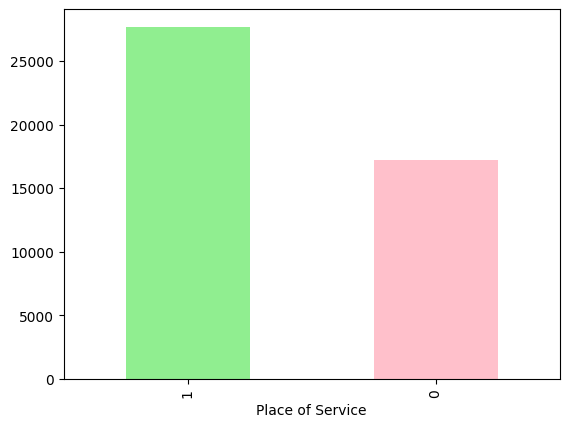

In [36]:
df['Place of Service'].value_counts().plot(kind='bar',color=['lightgreen', 'pink'])

<Axes: xlabel='State Code of the Provider'>

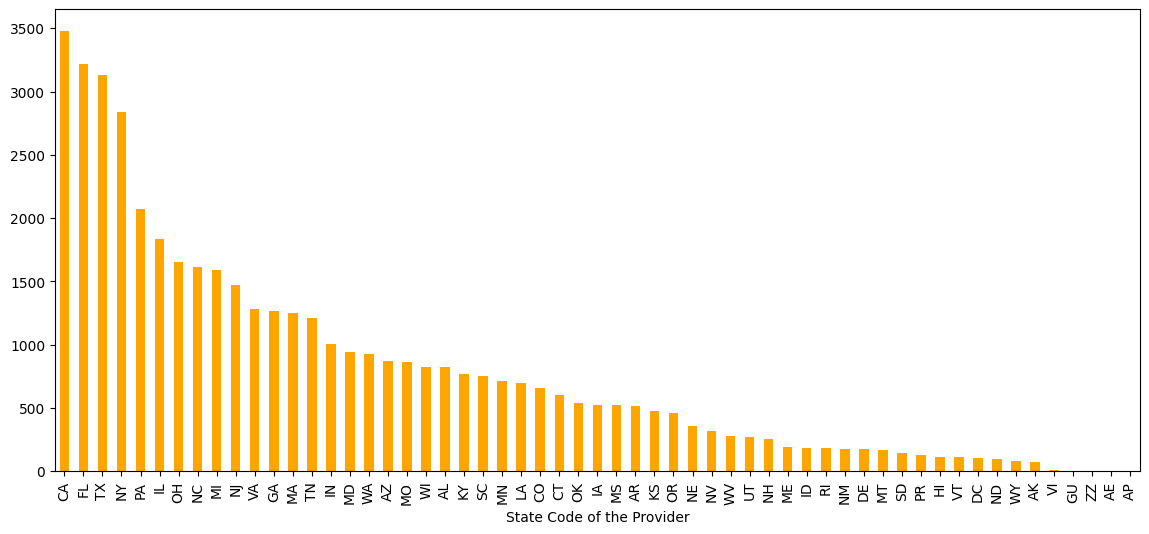

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
df['State Code of the Provider'].value_counts().plot(kind='bar',color='orange')

In [41]:
freq_map=df['State Code of the Provider'].value_counts()
df['State Code of the Provider_frq']=df['State Code of the Provider'].map(freq_map).drop(columns=['State Code of the Provider'])

In [42]:
df

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,City of the Provider,Zip Code of the Provider,...,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Gender of the Provider_0,Gender of the Provider_1,State Code of the Provider_frq
0,8774979,1891106191,UPADHYAYULA,SATYASREE,Unknown,M.D.,0,1402 S GRAND BLVD,SAINT LOUIS,631041004.0,...,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889,1.0,0.0,864
1,3354385,1346202256,JONES,WENDY,P,M.D.,0,2950 VILLAGE DR,FAYETTEVILLE,283043815.0,...,175,175,175,123.73,548.8,118.83,135.31525714,1.0,0.0,1617
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,0,20 WASHINGTON AVE,NORTH HAVEN,64732343.0,...,32,13,32,90.65,155,64.4396875,60.5959375,0.0,1.0,604
3,7594822,1770523540,FULLARD,JASPER,Unknown,MD,0,5746 N BROADWAY ST,KANSAS CITY,641183998.0,...,20,18,20,3.5,5,3.43,3.43,0.0,1.0,864
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,0,875 MILITARY TRL,JUPITER,334585700.0,...,33,24,31,26.52,40,19.539393939,19.057575758,0.0,1.0,3215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44890,5657489,1578566527,DYSART,STANLEY,H,M.D.,0,300 TOWER RD NE,MARIETTA,300609403.0,...,129,91,107,56.318914729,214,26.530077519,25.265348837,0.0,1.0,1270
44891,8307943,1841273968,CHILUKURI,KRISHNA,R,M.D.,0,4166 WYNTREE DR,NEWBURGH,476302521.0,...,28,27,28,40.14,69,24.8925,28.171428571,0.0,1.0,1010
44892,3032481,1306882840,FRED MEYER STORES INC,Unknown,Unknown,Unknown,1,13000 LAKE CITY WAY NE,SEATTLE,981254429.0,...,16,16,16,191.91625,195.235,188.080625,188.080625,0.0,1.0,926
44893,5058150,1518217744,"LCMS SOLUTIONS, INC.",Unknown,Unknown,Unknown,1,7301 GIRARD AVE,LA JOLLA,920375125.0,...,13,13,13,9.59,12.87,9.4,9.4,0.0,1.0,3474


In [44]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler=MinMaxScaler(feature_range=(0,1))
df['Zip Code of the Provider_scaled']=scaler.fit_transform(df[['Zip Code of the Provider']])


In [45]:
df.describe()

,index,National Provider Identifier,Entity Type of the Provider,Zip Code of the Provider,Medicare Participation Indicator,HCPCS Drug Indicator,Gender of the Provider_0,Gender of the Provider_1,State Code of the Provider_frq,Zip Code of the Provider_scaled
count,4.489500e+04,4.489500e+04,44895.000000,4.489500e+04,44895.000000,44895.000000,44895.000000,44895.000000,44895.000000,44895.000000
mean,4.910261e+06,1.498488e+09,0.042633,4.168191e+08,0.999688,0.061566,0.289832,0.710168,1674.174786,0.417646
std,2.837080e+06,2.871653e+08,0.202030,3.081487e+08,0.017656,0.240368,0.453689,0.453689,1054.459304,0.308760
min,3.900000e+02,1.003002e+09,0.000000,6.010000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.460003e+06,1.245691e+09,0.000000,1.445614e+08,1.000000,0.000000,0.000000,0.000000,828.000000,0.144848
50%,4.901349e+06,1.497847e+09,0.000000,3.678433e+08,1.000000,0.000000,0.000000,1.000000,1469.000000,0.368573
75%,7.340268e+06,1.740312e+09,0.000000,6.846710e+08,1.000000,0.000000,1.000000,1.000000,2835.000000,0.686030
max,9.847437e+06,1.993000e+09,1.000000,9.980193e+08,1.000000,1.000000,1.000000,1.000000,3474.000000,1.000000


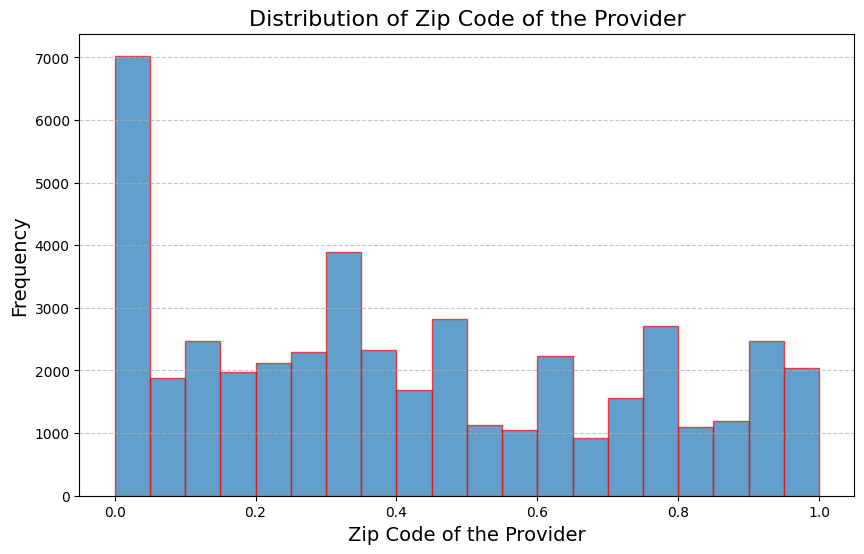

In [47]:
# Data for the histogram
data = df['Zip Code of the Provider_scaled']

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, edgecolor='red', alpha=0.7)
plt.title('Distribution of Zip Code of the Provider', fontsize=16)
plt.xlabel('Zip Code of the Provider', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()